In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
dataset=pd.read_csv("C:/Users/akskulka/Documents/Machine Learning/Titanic.csv")

In [4]:
dataset.shape()

TypeError: 'tuple' object is not callable

In [5]:
dataset.shape

(1313, 5)

In [8]:
dataset.head(10)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
5,"Anderson, Mr Harry",1st,47.00,male,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1
7,"Andrews, Mr Thomas, jr",1st,39.00,male,0
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1
9,"Artagaveytia, Mr Ramon",1st,71.00,male,0


## Analysing Data

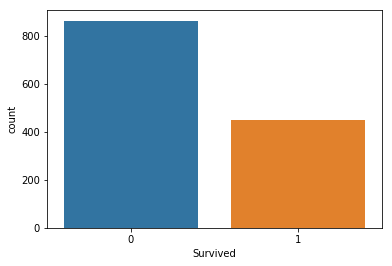

In [11]:
sns.countplot(x="Survived",data=dataset)

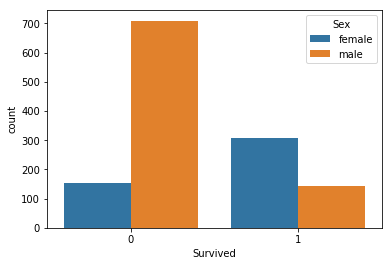

In [12]:
sns.countplot(x="Survived",hue="Sex",data=dataset)

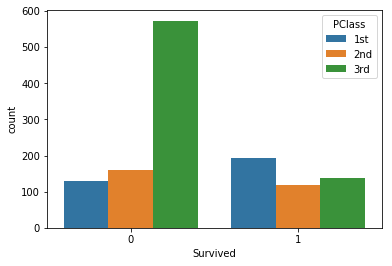

In [13]:
sns.countplot(x="Survived", hue="PClass", data=dataset)

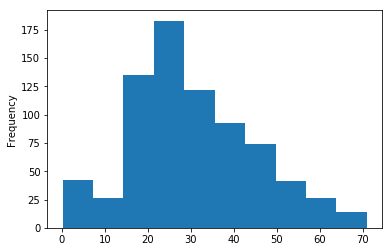

In [16]:
dataset["Age"].plot.hist()

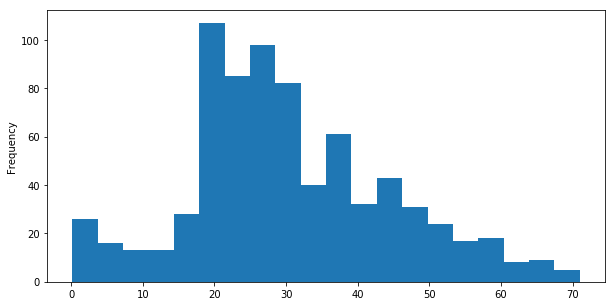

In [20]:
dataset["Age"].plot.hist(bins=20,figsize=(10,5))

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
Name        1313 non-null object
PClass      1312 non-null object
Age         756 non-null float64
Sex         1313 non-null object
Survived    1313 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [26]:
dataset.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

In [34]:
sns.heatmap(dataset.isnull(), yticklabels==False)

NameError: name 'yticklabels' is not defined

In [33]:
import numpy as np

In [36]:
sns.heatmap(dataset.isnull(), yticklabels==False,cmap="viridis")

NameError: name 'yticklabels' is not defined

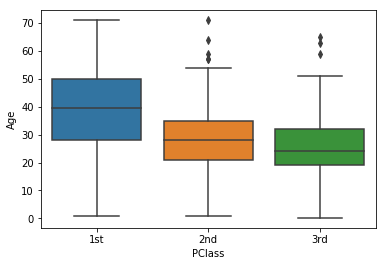

In [38]:
sns.boxplot(x="PClass", y="Age",data=dataset)

In [42]:
dataset.drop("Age",axis=1,inplace=True)

In [43]:
dataset.dropna(inplace=True)

In [44]:
dataset.drop("Age",axis=1,inplace=True)

KeyError: "['Age'] not found in axis"

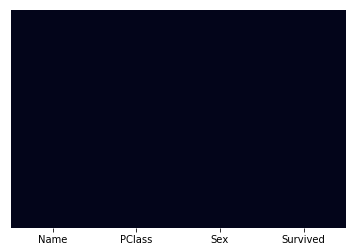

In [45]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [46]:
sns.heatmap(dataset.isnull(), yticklabels==False,cmap="viridis")

NameError: name 'yticklabels' is not defined

In [47]:
dataset.isnull().sum()

Name        0
PClass      0
Sex         0
Survived    0
dtype: int64

In [49]:
sex=pd.get_dummies(dataset["Sex"])
sex.head(5)

,female,male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [51]:
pd.get_dummies(dataset["PClass"],drop_first=True)

,2nd,3rd
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [54]:
dataset=pd.concat([dataset,sex,pc1],axis=1)

In [53]:
pc1=pd.get_dummies(dataset["Sex"])

In [55]:
dataset.head(5)

,Name,PClass,Sex,Survived,female,male,female,male
0,"Allen, Miss Elisabeth Walton",1st,female,1,1,0,1,0
1,"Allison, Miss Helen Loraine",1st,female,0,1,0,1,0
2,"Allison, Mr Hudson Joshua Creighton",1st,male,0,0,1,0,1
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,female,0,1,0,1,0
4,"Allison, Master Hudson Trevor",1st,male,1,0,1,0,1


In [56]:
dataset=pd.concat([dataset,sex,pc1],axis=1)

In [58]:
dataset.head(5)

,Name,PClass,Sex,Survived,female,male,female,male,female,male,female,male
0,"Allen, Miss Elisabeth Walton",1st,female,1,1,0,1,0,1,0,1,0
1,"Allison, Miss Helen Loraine",1st,female,0,1,0,1,0,1,0,1,0
2,"Allison, Mr Hudson Joshua Creighton",1st,male,0,0,1,0,1,0,1,0,1
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,female,0,1,0,1,0,1,0,1,0
4,"Allison, Master Hudson Trevor",1st,male,1,0,1,0,1,0,1,0,1


##Train Data

In [59]:
x=dataset.drop("Survived",axis=1)
y=dataset["Survived"]

In [60]:
from sklearn.cross_validation import train_test_split

ImportError: No module named cross_validation

In [63]:
import sklearn as sk

In [62]:
from sklearn.cross_validation import train_test_split

ImportError: No module named cross_validation

In [64]:
from sk.cross_validation import train_test_split

ImportError: No module named sk.cross_validation

In [65]:
import sklearn

In [67]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logmodel=LogisticRegression()

In [82]:
logmodel.fit(x_train,y_train)

ValueError: invalid literal for float(): 3rd

In [75]:
dataset.drop(sex,axis=1,inplace=True)

In [76]:
dataset.head(5)

,Name,PClass,Survived
0,"Allen, Miss Elisabeth Walton",1st,1
1,"Allison, Miss Helen Loraine",1st,0
2,"Allison, Mr Hudson Joshua Creighton",1st,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,0
4,"Allison, Master Hudson Trevor",1st,1


In [83]:
x=dataset.drop("Survived",axis=1)
y=dataset["Survived"]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logmodel=LogisticRegression()

In [82]:
logmodel.fit(x_train,y_train)

ValueError: invalid literal for float(): 3rd

In [97]:
dataset.drop("Name",axis=1,inplace=True)

In [98]:
dataset.head(2)

,Survived
0,1
1,0


In [99]:
x=dataset.drop("Survived",axis=1)
y=dataset["Survived"]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

In [101]:
logmodel=LogisticRegression()

In [102]:
logmodel.fit(x_train,y_train)

ValueError: Found array with 0 feature(s) (shape=(879, 0)) while a minimum of 1 is required.

In [103]:
dt=pd.read_csv("C:/Users/akskulka/Documents/Machine Learning/Titanic.csv")

In [104]:
dt.head(5)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [105]:
dt=pd.concat([dt,sex],axis=1)

In [106]:
dt.head(5)

,Name,PClass,Age,Sex,Survived,female,male
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1.0,0.0
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1.0,0.0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0.0,1.0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1.0,0.0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0.0,1.0


In [111]:
pc=pd.get_dummies(dt["PClass"])

In [122]:
dt=pd.concat([dt,sex],axis=1)

In [123]:
dt.head(2)

,Name,Survived,1st,2nd,3rd,female,male
0,"Allen, Miss Elisabeth Walton",1,1,0,0,1.0,0.0
1,"Allison, Miss Helen Loraine",0,1,0,0,1.0,0.0


In [124]:
dt.drop("Name",axis=1,inplace=True)

In [125]:
dt.head(2)

,Survived,1st,2nd,3rd,female,male
0,1,1,0,0,1.0,0.0
1,0,1,0,0,1.0,0.0


In [126]:
x=dt.drop("Survived",axis=1)
y=dt["Survived"]

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [128]:
logmodel.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [129]:
dt.isnull()

,Survived,1st,2nd,3rd,female,male
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [130]:
dt.isnull().sum()

Survived    0
1st         0
2nd         0
3rd         0
female      1
male        1
dtype: int64

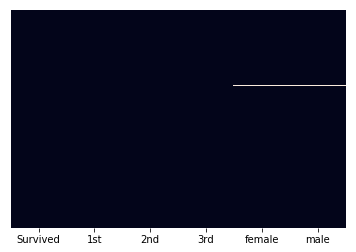

In [131]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False)

In [132]:
sns.heatmap(dt.isnull(), yticklabels==False)

NameError: name 'yticklabels' is not defined

In [133]:
dt.dropna(inplace=True)

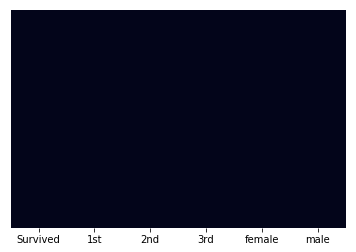

In [134]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False)

In [135]:
x=dt.drop("Survived",axis=1)
y=dt["Survived"]

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [137]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
predictions=logmodel.predict(x_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
classification_report(y_test,predictions)

u'              precision    recall  f1-score   support\n\n           0       0.80      0.98      0.88       247\n           1       0.95      0.59      0.72       147\n\n   micro avg       0.83      0.83      0.83       394\n   macro avg       0.87      0.78      0.80       394\nweighted avg       0.85      0.83      0.82       394\n'

In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
confusion_matrix(y_test,predictions)

array([[242,   5],
       [ 61,  86]], dtype=int64)

In [147]:
accuracy_score(y_test,predictions)

0.8324873096446701

In [146]:
from sklearn.metrics import accuracy_score